In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
#read the dataset
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


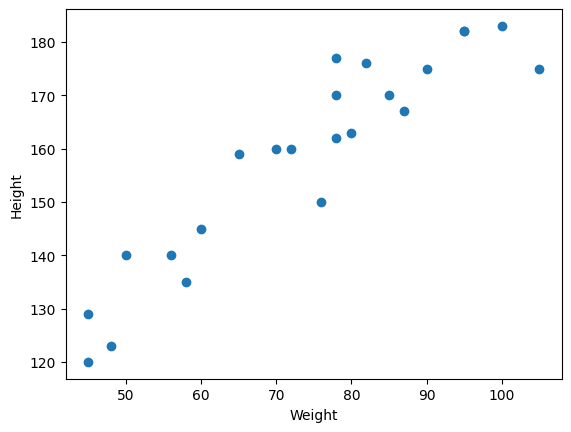

In [60]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [61]:
#divide our dataset into independent and dependent features
X=df[['Weight']]
y=df['Height']

1.dataset : divide the features based on independent and dependent features
2.train test split
3.Standardizing the data
4.training the model

In [62]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X.shape

(23, 1)

In [66]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [67]:
#standardized the dataset - train independent data
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

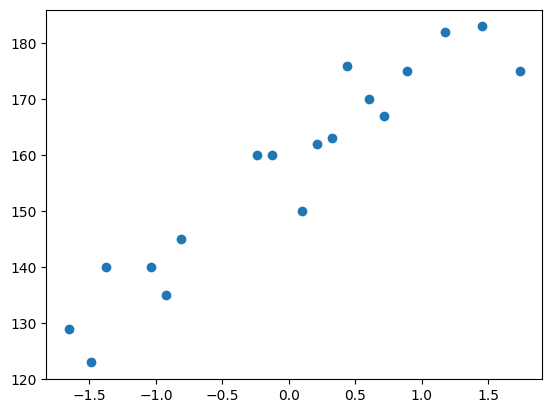

In [69]:
plt.scatter(X_train,y_train)
plt.show()

In [70]:
##train the simple linear regression modle
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


In [71]:
regressor.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [72]:
print("the slope or coefficient of weight is : ",regressor.coef_)
print("Intercept:", regressor.intercept_)

the slope or coefficient of weight is :  [17.03440872]
Intercept: 157.5


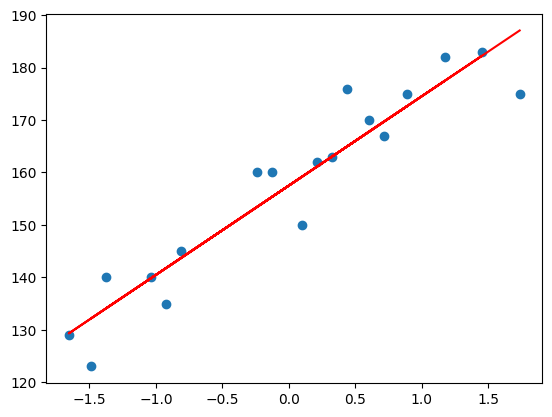

In [74]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.show()

In [ ]:
## prediction of the train data
# predicted height output = intercept + coef_(Weights)
# y_pred_train = 157.5b+ 17.03(X_train)

## prediction of the test data
# predicted height output = intercept + coef_(Weights)
# y_pred_test = 157.5b+ 17.03(X_test)

In [75]:
y_pred_test = regressor.predict(X_test)

In [76]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

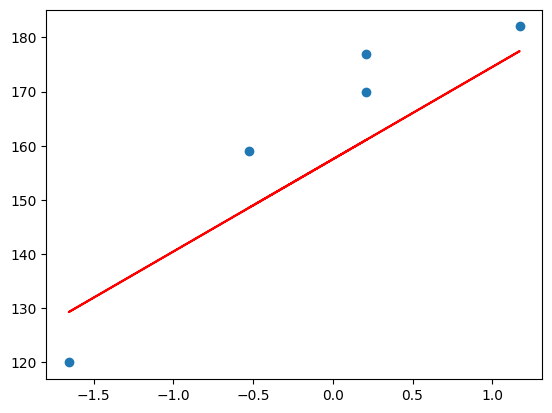

In [77]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),color='red')
plt.show()

In [ ]:
##performance matrix
#calculating mse, mae,rmse
#r square and adjusted r square



In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


109.77592599051664
9.822657814519232
10.477400726827081


In [80]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
score

0.776986986042344

In [81]:
#display adjusted r-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [ ]:
##always remember your r squared value will be always greater than adjusted r squared value

In [82]:
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [83]:
##new data point
scaled_weight = scaler.transform([[80]])
scaled_weight

c:\Users\Prapti Thombre\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [85]:
scaled_weight[0]

array([0.32350772])

In [86]:
print("the height prediction for weight 80 kg is:",regressor.predict([scaled_weight[0]]))

the height prediction for weight 80 kg is: [163.01076266]


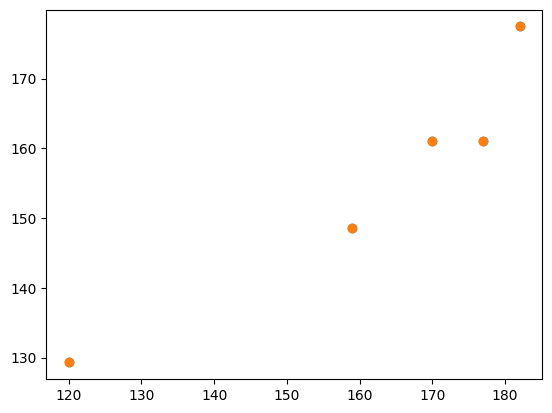

In [88]:
##assumptions 
##plot a scater plot for the predictions
plt.scatter(y_test,y_pred_test)
plt.show()

In [90]:
##residuals 
residuals = y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

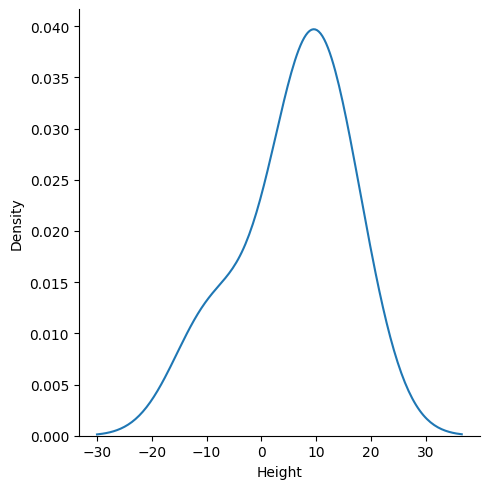

In [91]:
##pllot this residuals
import seaborn as sns
sns.displot(residuals,kind='kde')
plt.show()

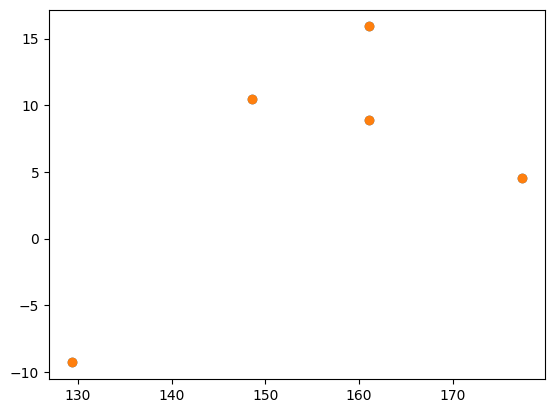

In [93]:
##Scatter plot with respect to prediction and residuals should be of uniform distribution
plt.scatter(y_pred_test, residuals)
plt.show()